# 1a) Planet Mass vs. Semi-major Axis (Confirmed exoplanets from NASA exoplanet archive)

In [7]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

In [8]:
# Function to read text files
def Read(filename):
    
    # Read and return data of confirmed exoplanets from NASA Exoplanet Archive
    data = np.genfromtxt(filename,dtype=None,delimiter=',',skip_header=97,names=True,invalid_raise=False,encoding=None)    
    return data

In [153]:
# Function to plot mass vs. semi-major axis (save is parameter to save figure or not)
def MassSemiMajor(save=False):

    # Save data using 'Read' function
    data = Read('table.csv')
    
    # Define x and y datasets to plot
    xdata = []
    ydata = []
    
    x_sini = data['pl_orbsmax'][np.where(data['pl_bmassprov']=='Msini')]
    y_sini = data['pl_bmasse'][np.where(data['pl_bmassprov']=='Msini')]
    mass_error = data['pl_bmasseerr1'][np.where(data['pl_bmassprov']=='Msini')]
    #print(y_sini[0:5])
    
    logx_sini = [np.log10(x) for x in x_sini]
    logy_sini = [np.log10(y) for y in y_sini]
    logmass_error = [np.log10(mass) for mass in mass_error]

    # Define list of symbols to use for different discovery methods
    markers = ['o','v','1','8','s','p','P','*','H','X','D']

    # Establish figure and axis object for plotting
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)    

    # Loop through discovery methods
    for i in range(0,len(np.unique(data['discoverymethod']))):

        # Identifty locations of data points for each discovery method
        detections = np.where(data['discoverymethod'] == np.unique(data['discoverymethod'])[i])

        # Define x (mass) and y (semi-major axis) datasets to plot
        x = data['pl_orbsmax'][detections]
        y = data['pl_bmasse'][detections]

        # Add x and y list for each method to a master list
        xdata.append(x)
        ydata.append(y)

        # Make a scatter plot for each datset with a new symbol for each discovery method
        ax.scatter(np.log10(xdata[i]),np.log10(ydata[i]),label=np.unique(data['discoverymethod'])[i],marker=markers[i])
    
    # Plot lower limits for planets with Msini mass measurements
    #ax.scatter(logx_sini,logy_sini,label='Msini',marker='^',color='g',alpha=0.3)
    #ax.errorbar(logx_sini,logy_sini,yerr=logmass_error,fmt='*',capthick=0.1,barsabove=True,lolims=True,alpha=0.3)
        
    # Set axis labels, title, and legend (legend outside of figure)
    ax.set_title('Planet Mass vs. Semi-Major Axis')
    ax.set_xlabel('log(a) (au)')
    ax.set_ylabel(r'log(M$_{p}) (M_{\oplus}$)')
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    # Decide whether or not to save file
    if save == True:
        plt.savefig('/d/users/jimmy/Documents/Planets/HW1a_plot.jpg')
        
    # Show plot
    plt.show()

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #760 (got 11 columns instead of 91)
    Line #4226 (got 11 columns instead of 91)
  """
/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


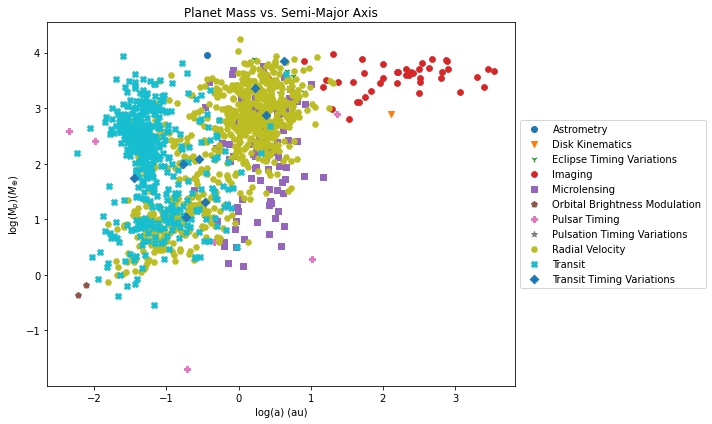

In [154]:
MassSemiMajor()

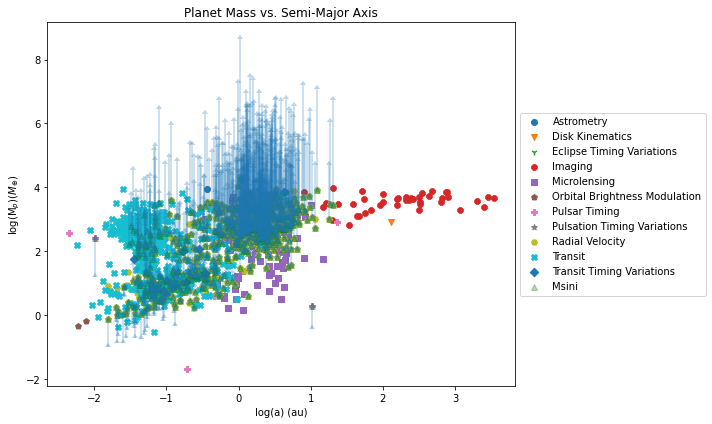

## Comments about 1a:
### The different clusters in this plot appear to be centered around a central semi-major axis, but spread about wide range of masses. 
### The <u> teal blue cluster </u> on the left reveals that most exoplanets detected by the <u>transit method</u> have <u> high masses </u> and <u> lie very close to their host star </u>. This makes sense as this combination of properties causes more significant dips in the host star's light curve, thus making them easiest to detect this way. 
### The <u> dark yellow cluster(s)</u> in the top middle and bottom left of the plot reveal that <u>radial velocity</u> detections span a wide range of masses and semi-major axes, although <u>more of these detections appear to be at higher masses</u>. One would expect more high-mass detections with this method as these planets would have a more pronounced effect on Doppler shifting spectra of their host star.
### The <u>red cluster</u> at the top right of the plot reveals that most <u>imaging</u> detections have <u>high masses and large semi-major axes</u>. This agrees with the bias of this method towards finding larger planets that can reflect more light from their host star and further planets that are less likely to to be lost in the glare of the host star.
### The <u>purple cluster</u> in the center of the plot indicates that <u>microlensing</u> selects <u>less massive</u> planets that are <u>further from their host star</u>. This method can detect small variations in a star's light curve, but very few systems are aligned precisely enough to observe this, hence the scarcity of microlensing detections.
### There is only 1 detection made by astrometric observations. There is also only 1 detection made by disk kinematic observations.
### There is an obvious gap in detections on the bottom and right of this plot. There are <u>almost no detections of low mass, low semi-major axis</u> planets which makes sense since they are heavily obscured by their host star and are difficult to detect indirectly since they have a miniscule impact on the star itself. The lack of detections in the right of this plot suggests that for a planet far from its host star to be detected, it needs to be very massive.

# 1b) Orbit Eccentricity vs. Semi-Major Axis

In [9]:
# Function to plot eccentricity vs. semi-major axis (save is parameter to save figure or not)
def EccenSemiMajor(save=False):

    # Save data using 'Read' function
    data = Read('table.csv')
    
    # Define x and y datasets to plot
    xdata = []
    ydata = []

    # Define list of symbols to use for different discovery methods
    markers = ['o','v','1','8','s','p','P','*','H','X','D']

    # Establish figure and axis object for plotting
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)    

    # Loop through discovery methods
    for i in range(0,len(np.unique(data['discoverymethod']))):

        # Identifty locations of data points for each discovery method
        detections = np.where(data['discoverymethod'] == np.unique(data['discoverymethod'])[i])

        # Define x (mass) and y (semi-major axis) datasets to plot
        x = data['pl_orbsmax'][detections]
        y = data['pl_orbeccen'][detections]

        # Add x and y list for each method to a master list
        xdata.append(x)
        ydata.append(y)

        # Make a scatter plot for each datset with a new symbol for each discovery method
        ax.scatter(np.log10(xdata[i]),ydata[i],label=np.unique(data['discoverymethod'])[i],marker=markers[i])
    
    # Set axis labels, title, and legend (legend outside of figure)
    ax.set_title('Eccentricity vs. Semi-Major Axis')
    ax.set_xlabel('log(a) (au)')
    ax.set_ylabel('e')
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    # Decide whether or not to save file
    if save == True:
        plt.savefig('/d/users/jimmy/Documents/Planets/HW1b_plot.jpg')
        
    # Show plot
    plt.show()

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #760 (got 11 columns instead of 91)
    Line #4226 (got 11 columns instead of 91)
  """


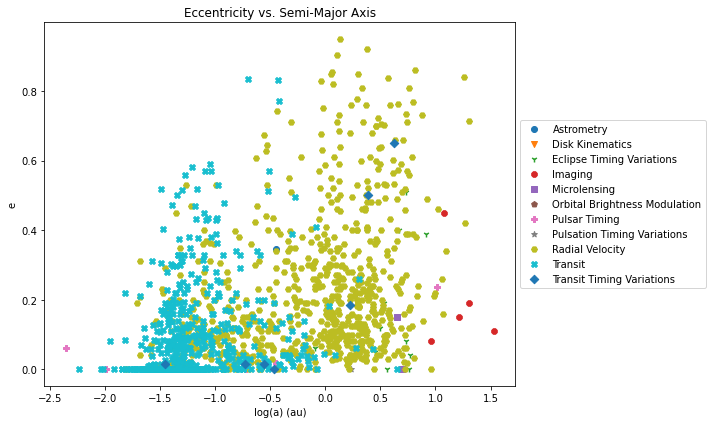

In [10]:
EccenSemiMajor(True)

## Comments about 1b
### <u>Transit</u> detections are correlated with <u>close, minimally-eccentric orbits</u> (a<1 au, most e<0.20). This makes sense because closer planets cause more signficant dips in their host star's light curve, making them easiest to detect when they cross in front of the star. This also makes sense because the tidal forces acting on planets close to their host star circularize (bring e closer 0) their orbits.
### <u>Radial velocity</u>  detections are correlated with <u>comparitively further orbits than those for the transit method</u>, but occupy a <u>wide range of eccentricities</u> from nearly circular (e$\approx$0) to nearly unbound, parabolic orbits (e$\approx$1).
### <u>Imaging</u> detections are correlated with <u>large semi-major axes</u> (a>10au) and <u>low eccentricies</u> (e<0.50) as expected since planets are less obscured further from their host star, making them easier to see

# 1c) Mass vs. Effective Temperature

In [161]:
# Function to plot mass vs. effective temperature (save is parameter to save figure or not)
def MassTeff(save=False):

    # Save data using 'Read' function
    data = Read('table.csv')
    
    # Define x and y datasets to plot
    xdata = []
    ydata = []

    # Define list of symbols to use for different discovery methods
    markers = ['o','v','1','8','s','p','P','*','H','X','D']

    # Establish figure and axis object for plotting
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)    

    # Loop through discovery methods
    for i in range(0,len(np.unique(data['discoverymethod']))):

        # Identifty locations of data points for each discovery method
        detections = np.where(data['discoverymethod'] == np.unique(data['discoverymethod'])[i])

        # Define x (mass) and y (semi-major axis) datasets to plot
        x = data['st_teff'][detections]
        y = data['pl_bmasse'][detections]

        # Add x and y list for each method to a master list
        xdata.append(x)
        ydata.append(y)

        # Make a scatter plot for each datset with a new symbol for each discovery method
        ax.scatter(np.log10(xdata[i]),np.log10(ydata[i]),label=np.unique(data['discoverymethod'])[i],marker=markers[i])

    # Set axis labels, title, and legend (legend outside of figure)
    ax.set_title(r'Planet Mass vs. Star T$_{eff}$')
    ax.set_xlabel(r'log(T$_{eff})$ (K)')
    ax.set_ylabel(r'log(M$_{p}) (M_{\oplus}$)')
    
    # Exclude outliers to see trends better
    ax.set_xlim(3.25,4.25)
    
    # Plot vertical line of Sun's effective temperature
    ax.axvline(np.log10(5780),linestyle='--',color='red',label=r'$T_{\odot}$')
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    # Decide whether or not to save file
    if save == True:
        plt.savefig('/d/users/jimmy/Documents/Planets/HW1c_plot.jpg')
        
    # Show plot
    plt.show()

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #760 (got 11 columns instead of 91)
    Line #4226 (got 11 columns instead of 91)
  """


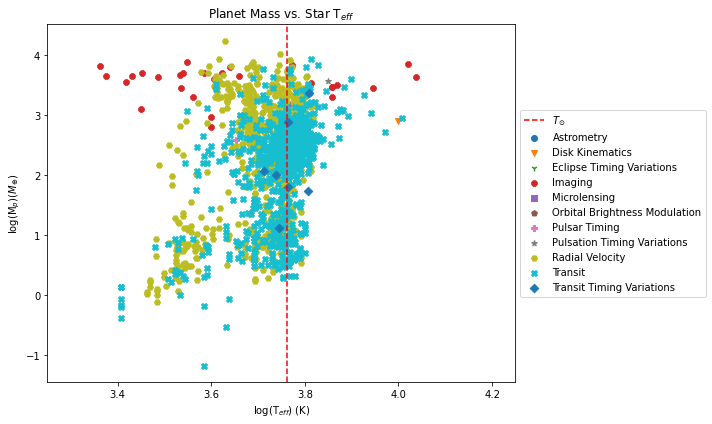

In [162]:
MassTeff()

## Comments about 1c
### With the red vertical dashed-line indicating the surface temperature of the Sun (5780 K), it appears that a <u>large majority of detections</u> across all methods <u>lie near Sun-like stars</u> (4000K<T<8000K). This result suggests that planets are <u>less likely to form around very hot stars</u>.
### Many of the large exoplanet surveys sought out planets around habitable stars which we, by default, associate with stars like our Sun. So it is not surpising that a majority of the detected planets orbit around stars with surface temperatures near the Sun's.

# 1d) Mass vs. Radius

In [163]:
# Function to plot mass vs. radius (save is parameter to save figure or not)
def MassRadius(save=False):

    # Save data using 'Read' function
    data = Read('table.csv')
    
    # Define x and y datasets to plot
    xdata = []
    ydata = []
    
    # Define constant densities in CGS units and Earth-based units
    DensWaterCGS = 1.0*(u.g/(u.cm**3))
    DensWaterEarth = DensWaterCGS.to(const.M_earth/(const.R_earth**3))
    DensCrustCGS = 2.5*(u.g/(u.cm**3)) # source: Hyperphysics
    DensCrustEarth = DensCrustCGS.to(const.M_earth/(const.R_earth**3))

    # Define list of symbols to use for different discovery methods
    markers = ['o','v','1','8','s','p','P','*','H','X','D']

    # Establish figure and axis object for plotting
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)    
    
    # Loop through discovery methods
    for i in range(0,len(np.unique(data['discoverymethod']))):

        # Identifty locations of data points for each discovery method
        detections = np.where(data['discoverymethod'] == np.unique(data['discoverymethod'])[i])

        # Define x (mass) and y (semi-major axis) datasets to plot
        x = data['pl_rade'][detections]
        y = data['pl_bmasse'][detections]
        
        # Add x and y list for each method to a master list
        xdata.append(x)
        ydata.append(y)

        # Make a scatter plot for each datset with a new symbol for each discovery method
        ax.scatter(np.log10(xdata[i]),np.log10(ydata[i]),label=np.unique(data['discoverymethod'])[i],marker=markers[i])
    
    # Convert xdata from list-of-lists to flattened list
    xflat = [y for x in xdata for y in x]
    
    # Find corresponding mass of water for different radii and plot line of constant density
    massWater = [DensWaterEarth.value*(x**3) for x in xflat]
    massCrust = [DensCrustEarth.value*(x**3) for x in xflat]
    ax.plot(np.log10(xflat),np.log10(massWater),color='blue',label=r'Density of Water (1.0g/$cm^{3}$)')
    ax.plot(np.log10(xflat),np.log10(massCrust),color='black',label='Density of Earth\'s Crust (2.5g/$cm^{3}$)')
    
    # Set axis labels, title, and legend (legend outside of figure)
    ax.set_title(r'Planet Mass vs. Planet Radius')
    ax.set_xlabel(r'log(R$_{p}) (R{\oplus}$)')
    ax.set_ylabel(r'log(M$_{p}) (M_{\oplus}$)')
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    # Decide whether or not to save file
    if save == True:
        plt.savefig('/d/users/jimmy/Documents/Planets/HW1d_plot.jpg')
        
    # Show plot
    plt.show()

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #760 (got 11 columns instead of 91)
    Line #4226 (got 11 columns instead of 91)
  """


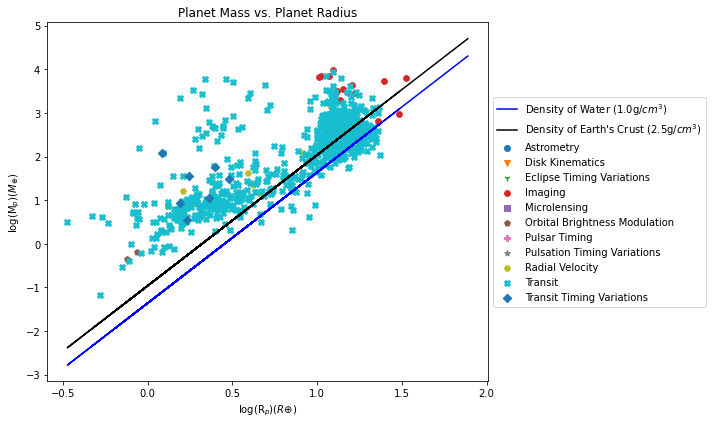

In [164]:
MassRadius()

## Comments about 1d
### Most of the confirmed exoplanets have densities comparable to that of the Earth's crust, but much greater than that of water. This suggests that many of these detections are terrestrial/rocky planets like the Earth, though most of them are not likely to host liquid water. 

# 1e) Histogram of Metallicity

In [116]:
# Function to plot mass vs. semi-major axis (save is parameter to save figure or not)
def Metallicity(save=False):
    # Save data using 'Read' function
    data = Read('table.csv')
    
    # Extract list of metallicities
    metallicity = data['st_met']
    
    # Plot metallicity of host stars
    plt.title('Histogram of Host Star Metallicity')
    plt.xlabel('Host Metallicity (dex)')
    plt.ylabel('Number of Planets')
    plt.hist(metallicity,bins=20)
    plt.axvline(0,linestyle='--',color='red')
    
    # Decide whether or not to save file
    if save == True:
        plt.savefig('/d/users/jimmy/Documents/Planets/HW1e_plot.jpg')
        
    # Show plot
    plt.show()

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #760 (got 11 columns instead of 91)
    Line #4226 (got 11 columns instead of 91)
  """


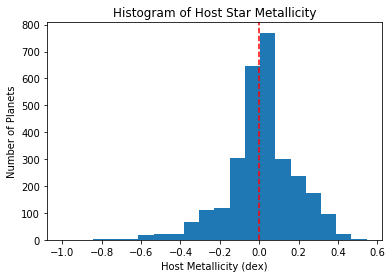

In [117]:
Metallicity(True)

## Comments about 1e
### This histogram suggests that planets are more likely to be found around metal-rich stars (dex > 0) and most exoplanet detections were found around stars with metallicites similar to that of the Sun. This data is biased towards planets near stars like the Sun because most detections came from observations of stars in the local galaxy, where the distribution of metals is approximately the same as in our Solar System.

# 1f) Planet Radius vs. System Distance

In [84]:
# Function to plot planet radius vs. system distance (save is parameter to save figure or not)
def RadDist(save=False):

    # Save data using 'Read' function
    data = Read('table.csv')
    
    # Define x and y datasets to plot
    xdata = []
    ydata = []

    # Define list of symbols to use for different discovery methods
    markers = ['o','v','1','8','s','p','P','*','H','X','D']

    # Establish figure and axis object for plotting
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)    
    
    # Loop through discovery methods
    for i in range(0,len(np.unique(data['discoverymethod']))):

        # Identifty locations of data points for each discovery method
        detections = np.where(data['discoverymethod'] == np.unique(data['discoverymethod'])[i])

        # Define x (mass) and y (semi-major axis) datasets to plot
        x = data['sy_dist'][detections]
        y = data['pl_rade'][detections]
        
        # Add x and y list for each method to a master list
        xdata.append(x)
        ydata.append(y)

        # Make a scatter plot for each datset with a new symbol for each discovery method
        ax.scatter(np.log10(xdata[i]),np.log10(ydata[i]),label=np.unique(data['discoverymethod'])[i],marker=markers[i])
    
    # Set axis labels, title, and legend (legend outside of figure)
    ax.set_title(r'Planet Radius vs. System Distance')
    ax.set_xlabel(r'log(D$_{sys}$) (pc)')
    ax.set_ylabel(r'log(R$_{p}) (R{\oplus}$)')
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    # Decide whether or not to save file
    if save == True:
        plt.savefig('/d/users/jimmy/Documents/Planets/HW1f_plot.jpg')
        
    # Show plot
    plt.show()

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #760 (got 11 columns instead of 91)
    Line #4226 (got 11 columns instead of 91)
  """


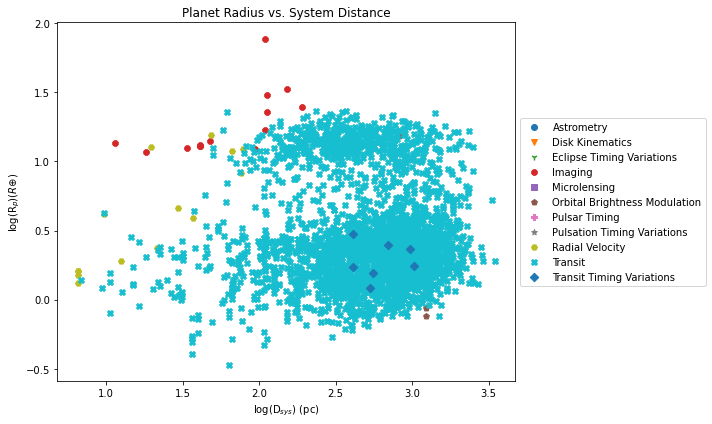

In [85]:
RadDist()

## Comments about 1f
### I chose these parameters to investigate the sizes of planets that the different surveys and detection methods are sensitive to. I find it remarkable that a significant majority of these detections have radii between 1 and 10 R$_{\oplus}$ and were observed well beyond 100 pc. To me, this exemplifies the power of the transit method for detecting not only massive planets, but very distant and small planets.
### Also, as expected, the imaging detections have a remarkable minimum size of 10 R$_{\oplus}$ and are detected (relatively) close to Earth. The lack of detections conveys the difficulty of seeing a planet directly amidst the glare of its host.